In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

In [2]:
tweets_df = pd.read_csv('vaccination_all_tweets.csv')

In [3]:
tweets_df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [6]:
print("Data Shape:",tweets_df.shape)

Data Shape: (36132, 16)


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36132 entries, 0 to 36131
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                36132 non-null  int64 
 1   user_name         36132 non-null  object
 2   user_location     27854 non-null  object
 3   user_description  33647 non-null  object
 4   user_created      36132 non-null  object
 5   user_followers    36132 non-null  int64 
 6   user_friends      36132 non-null  int64 
 7   user_favourites   36132 non-null  int64 
 8   user_verified     36132 non-null  bool  
 9   date              36132 non-null  object
 10  text              36132 non-null  object
 11  hashtags          28474 non-null  object
 12  source            36102 non-null  object
 13  retweets          36132 non-null  int64 
 14  favorites         36132 non-null  int64 
 15  is_retweet        36132 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.9+ MB


In [8]:
tweets_df.describe()

id  user_followers   user_friends  user_favourites  \
count  3.613200e+04    3.613200e+04   36132.000000     3.613200e+04   
mean   1.364403e+18    1.101952e+05    1307.265471     1.495900e+04   
std    8.517782e+15    8.819035e+05    6085.895722     4.197498e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.361443e+18    1.180000e+02     142.000000     3.490000e+02   
50%    1.366410e+18    5.720000e+02     417.000000     2.125000e+03   
75%    1.370471e+18    2.864250e+03    1186.250000     1.114625e+04   
max    1.374261e+18    1.489729e+07  380428.000000     1.205878e+06   

           retweets     favorites  
count  36132.000000  36132.000000  
mean       3.195644     14.062299  
std       34.744462    189.727021  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      4.000000  
max     2360.000000  22815.000000

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total,percent],axis =1 , keys=["Total","Percent"])
    types = []
    for col in data.columns:
        dtype  = str(data[col].dtype)
        types.append(dtype)
    tt["Types"] = types
    return(np.transpose(tt))

In [10]:
missing_data(tweets_df)

id user_name user_location user_description user_created  \
Total        0         0          8278             2485            0   
Percent      0         0       22.9104          6.87756            0   
Types    int64    object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent              0            0               0             0       0   
Types            int64        int64           int64          bool  object   

           text hashtags     source retweets favorites is_retweet  
Total         0     7658         30        0         0          0  
Percent       0  21.1945  0.0830289        0         0          0  
Types    object   object     object    int64     int64       bool

In [12]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose)

In [13]:
unique_values(tweets_df)

<function numpy.transpose(a, axes=None)>

In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [15]:
most_frequent_values(tweets_df)

id          user_name user_location  \
Total                             36132              36132         27854   
Most frequent item  1364449897190027270  Workout Solutions         India   
Frequence                             1                538          1031   
Percent from total                0.003              1.489         3.701   

                                                     user_description  \
Total                                                           33647   
Most frequent item  George Tsanis – Workout Solutions Health and F...   
Frequence                                                         538   
Percent from total                                              1.599   

                           user_created user_followers user_friends  \
Total                             36132          36132        36132   
Most frequent item  2010-09-20 17:01:08           1170          183   
Frequence                           538            304          332   
Percent from total                1.489          0.841        0.919   

                   user_favourites user_verified                 date  \
Total                        36132         36132                36132   
Most frequent item               0         False  2021-03-02 23:02:10   
Frequence                      515         31967                    4   
Percent from total           1.425        88.473                0.011   

                                                                 text  \
Total                                                           36132   
Most frequent item  #Covid19 Vaccine Rollout Needs Spark Even More...   
Frequence                                                           5   
Percent from total                                              0.014   

                       hashtags           source retweets favorites is_retweet  
Total                     28474            36102    36132     36132      36132  
Most frequent item  ['Moderna']  Twitter Web App        0         0      False  
Frequence                  1474            11653    22975     14841      36132  
Percent from total        5.177           32.278   63.586    41.074        100

In [16]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

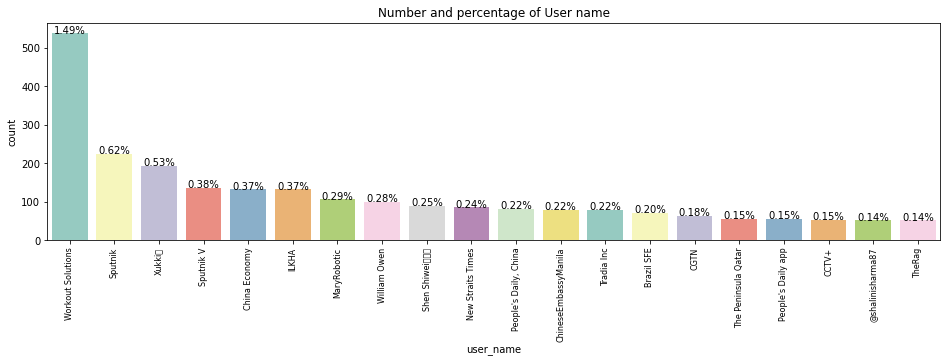

In [17]:
plot_count("user_name", "User name", tweets_df,4)

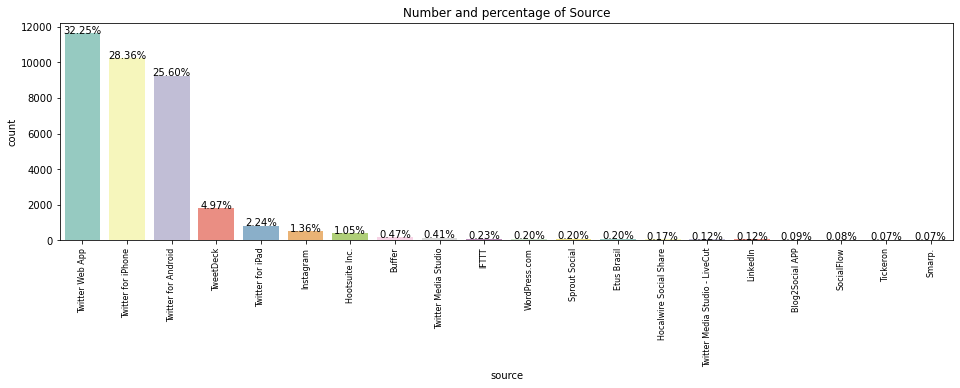

In [18]:
plot_count("source", "Source", tweets_df,4)

In [19]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [21]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

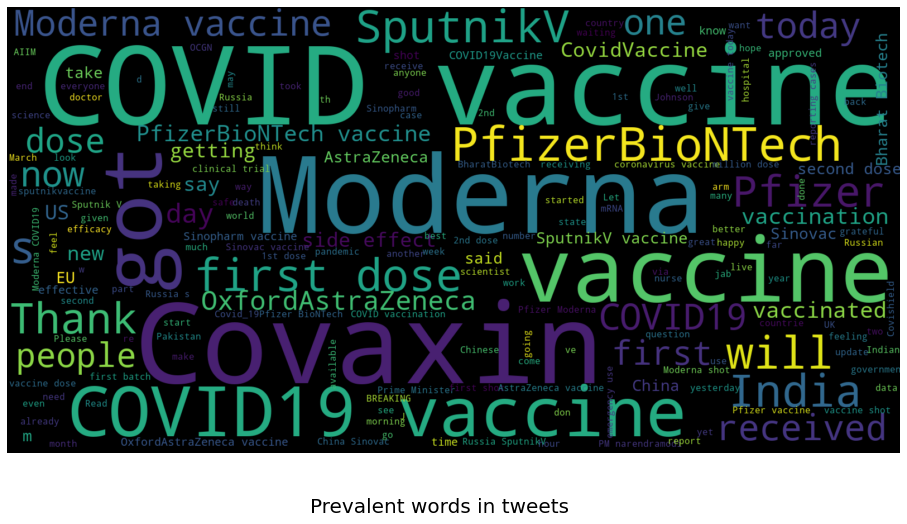

In [23]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

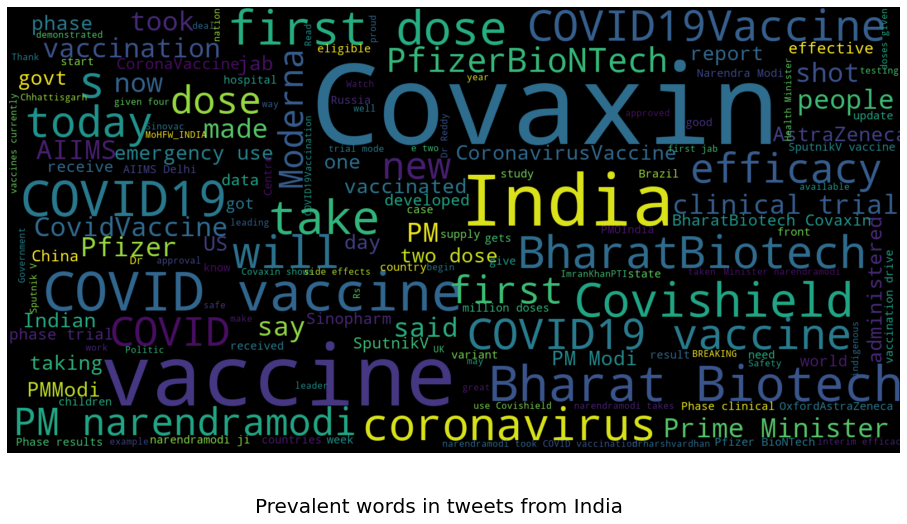

In [25]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

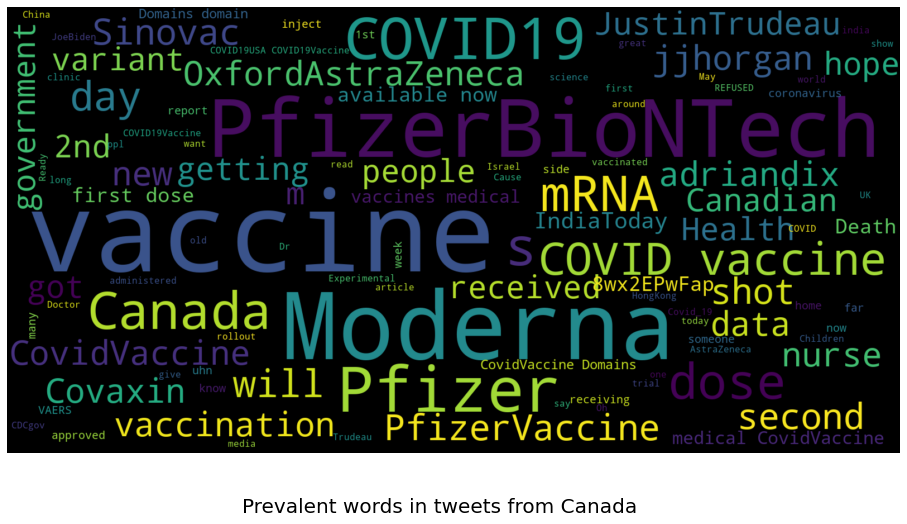

In [27]:
canada_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(canada_df['text'], title = 'Prevalent words in tweets from Canada')

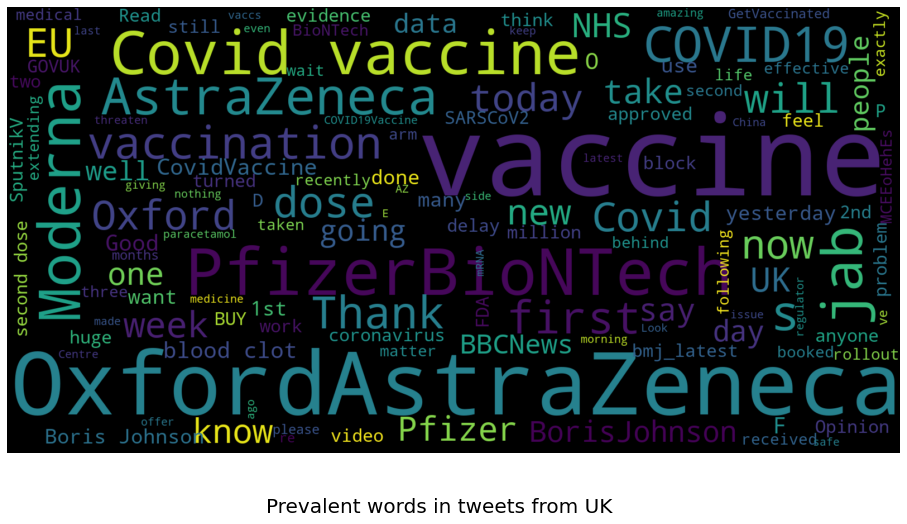

In [29]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

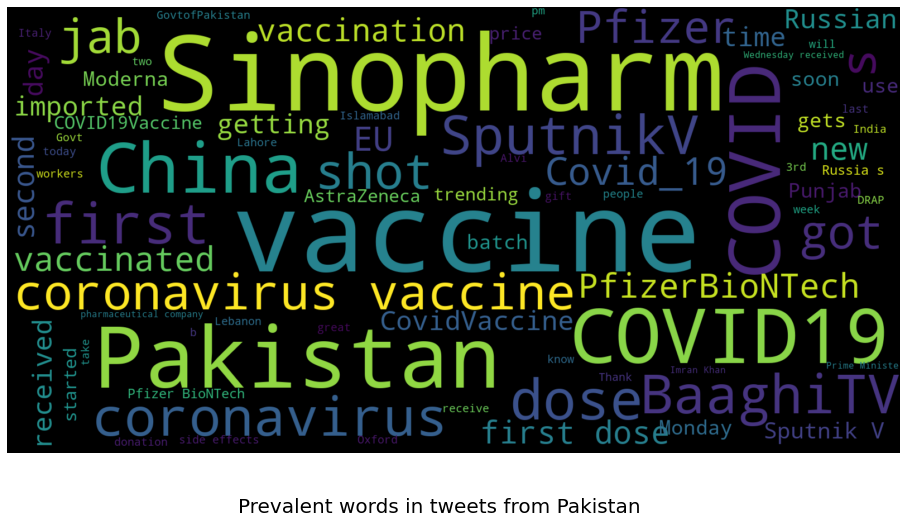

In [30]:
Pak_df = tweets_df.loc[tweets_df.user_location=="Pakistan"]
show_wordcloud(Pak_df['text'], title = 'Prevalent words in tweets from Pakistan')

In [31]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

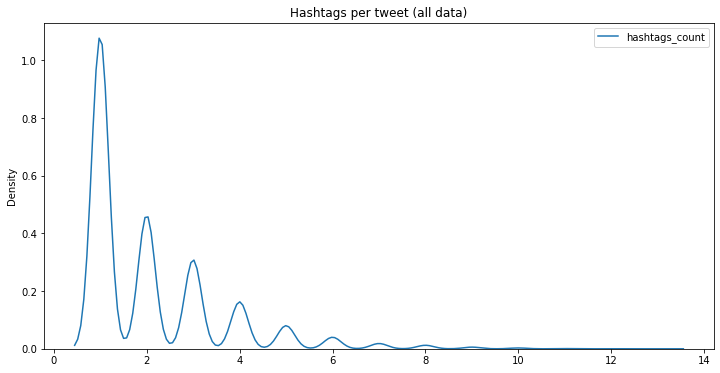

In [33]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [34]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 11351


In [35]:
tweets_df['hashtags_individual'].head()

0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

In [36]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [37]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [38]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [39]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

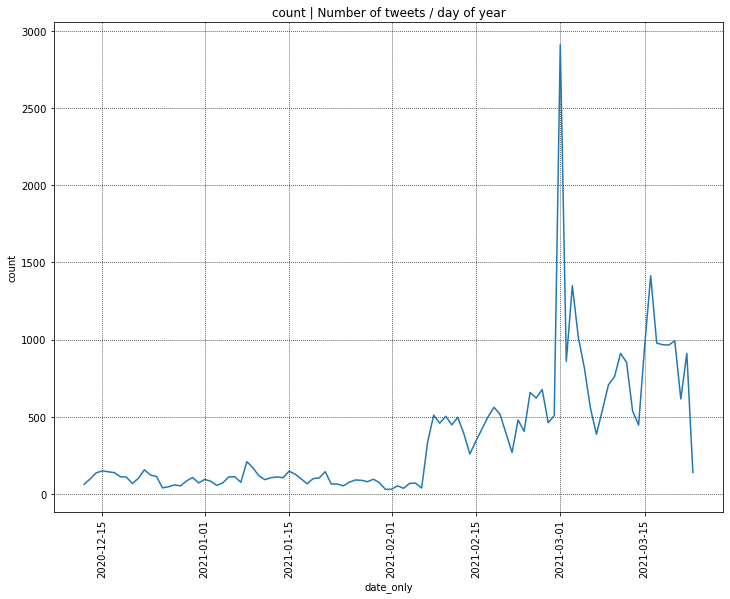

In [40]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

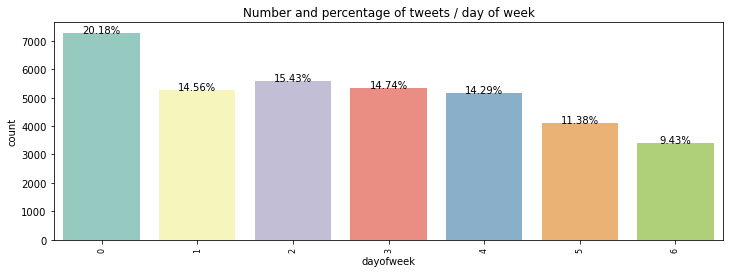

In [41]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

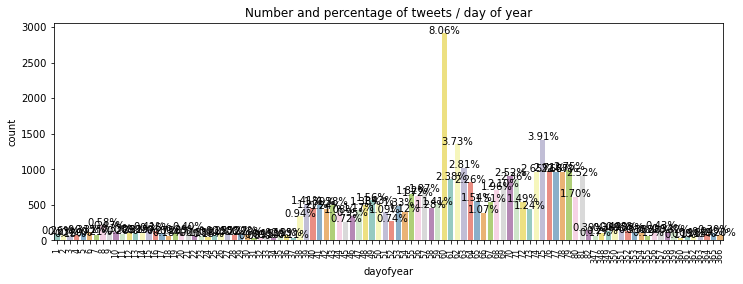

In [42]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

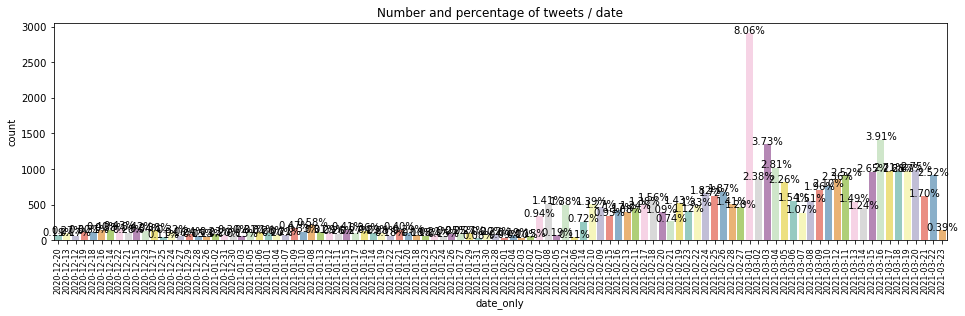

In [44]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

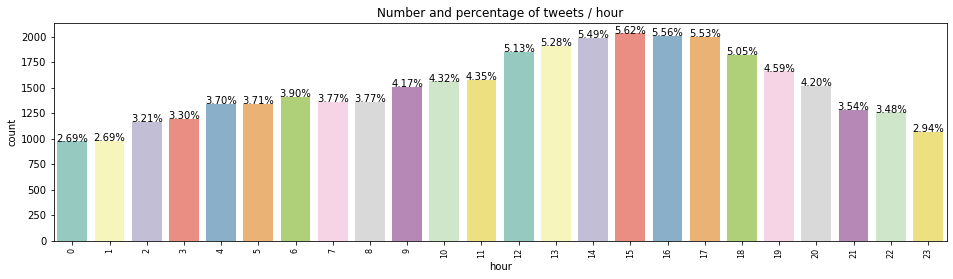

In [45]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

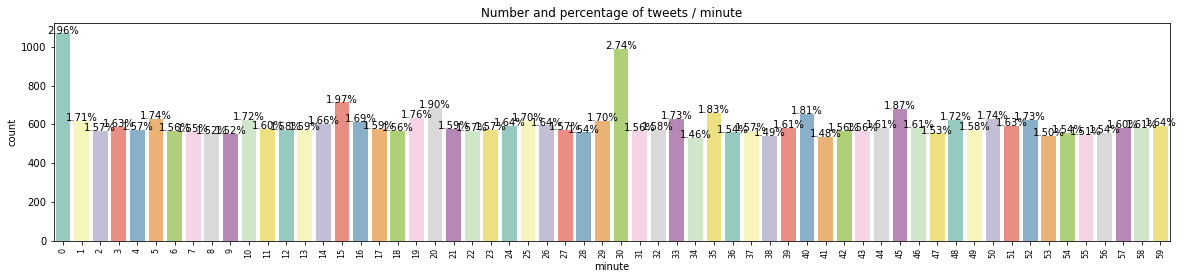

In [46]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)